# Практическое задание №3

1. Промоделировать нелинейную модель y = f (x, a, b) + δ с несмещенной нормально распределенной ошибкой, дисперсия которой равна ε, считая x стандартно нормально распределенной случайной величиной.
2. Оценить параметры нелинейной модели по методу наименьших квадратов (численно). Применить к модельным данным линейную модель и оценить параметры. Построить на двумерной диаграмме основную и линейную модель. Сравнить невязки для обеих моделей.
3. Для линейной модели выполнить дисперсионный анализ, проверить значимость прогноза и коэффициентов регрессии. Сравнить непосредственные вычисления с результатами встроенной функции.

$$
    Вариант\;(a): \; f(x, a, b) = e^{ax} + b,\; a = 0.4,\; b = 1,\; ε = 0.3
$$

In [29]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(15)

In [2]:
a = 0.4
b = 1
eps = 0.3
size = 10**3

In [55]:
def f(X, a=a, b=b):
    return np.exp(a*X) + b

In [4]:
delta = np.random.normal(loc=0, scale=np.sqrt(eps), size=size)
x = np.random.normal(loc=0, scale=1, size=size)
y = f(x) + delta

Оценка параметров

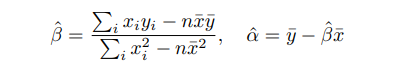

In [8]:
def lin_coef(X, Y):
    N = len(X)
    X_mean = np.mean(X)
    Y_mean = np.mean(y)
    Beta = (np.dot(X, Y) - N*X_mean*Y_mean)/(np.dot(X,X) - N*X_mean**2)
    Alpha = Y_mean - Beta*X_mean
    return Alpha, Beta

In [9]:
alpha, beta = lin_coef(x, y)
print(f"Параметры линейной модели: alpha = {alpha}, beta = {beta}")

Параметры линейной модели: alpha = 2.0665891458817875, beta = 0.41352426347105864


In [10]:
def f_lin(X, a=alpha, b=beta):
    return a + X*b

In [11]:
y_lin = f_lin(x)

$$
    Источники \; вариации: \; общий \; Q_T, \; обусловленный \; регрессией \; Q_R, \; невязка \; Q_E. \; Коэффициент \; детерминации \; R_2.
$$

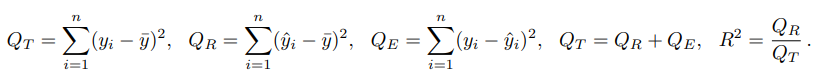

In [18]:
y_mean = np.mean(y)
Q_t = np.sum((y - y_mean)**2)
Q_r = np.sum((y_lin - y_mean)**2)
Q_e = np.sum((y - y_lin)**2)
R2 = Q_r/Q_t

In [19]:
print(f"Q_t = {Q_t}")
print(f"Q_r = {Q_r}")
print(f"Q_e = {Q_e}")
print(f"R2 = {R2}")
print(f"Q_r + Q_e = {Q_r + Q_e}")

Q_t = 491.37020297592295
Q_r = 173.32413302367658
Q_e = 318.0460699522463
R2 = 0.3527363522939738
Q_r + Q_e = 491.3702029759229


$$
    Равенство \; Q_T = Q_R + Q_E \; выполнено
$$

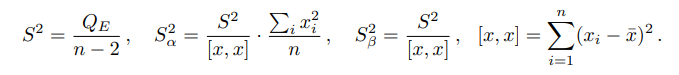

In [20]:
x_mean = np.mean(x)
xx = np.sum((x - x_mean)**2)
S2 = Q_e/(size - 2)
S2a = S2*np.sum(x**2)/(xx*size)
S2b = S2/xx

In [21]:
print(f"S^2 = {S2}")
print(f"S^2_a = {S2a}")
print(f"S^2_b = {S2b}")

S^2 = 0.31868343682589806
S^2_a = 0.00031891113163148263
S^2_b = 0.00031441441517762026


Статистики для проверки значимости прогноза и коэффициентов регрессии

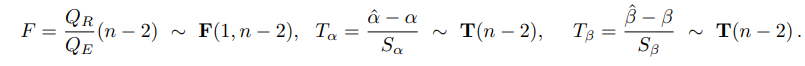

In [22]:
F = Q_r/Q_e*(size - 2)
T_alpha = alpha/np.sqrt(S2a)
T_beta = beta/np.sqrt(S2b)
P_f = scipy.stats.f.pdf(F, 1, size-2)
P_a = 2*(1 - scipy.stats.t.cdf(T_alpha, size-2))
P_b = 2*(1 - scipy.stats.t.cdf(T_beta, size-2))

In [23]:
print(f"F = {F}")
print(f"T_a = {T_alpha}")
print(f"T_b = {T_beta}")
print(f"P_f = {P_f}")
print(f"P_a = {P_a}")
print(f"P_b = {P_b}")

F = 543.8755611210706
T_a = 115.72289901019042
T_b = 23.32113979035053
P_f = 7.381066133126718e-97
P_a = 0.0
P_b = 0.0


p_values меньше 0.05, значит модель статистически значимая

Проверим параметры с помощью встроенной функции

In [39]:
x_c = np.copy(x)
y_c = np.copy(y)
reg = LinearRegression().fit(x_c.reshape(-1, 1), y_c.reshape(-1, 1))

In [47]:
print(f"Коэффициенты, полученные с помошью встроенной функции: alpha = {reg.intercept_[0]}, beta = {reg.coef_[0][0]}")
print(f"Вычисленные коэффициенты: alpha = {alpha}, beta = {beta}")

Коэффициенты, полученные с помошью встроенной функции: alpha = 2.0665891458817875, beta = 0.4135242634710587
Вычисленные коэффициенты: alpha = 2.0665891458817875, beta = 0.41352426347105864


Посчитаем результаты для нелинейной модели

In [63]:
def f_min(params, x=x, y=y, f=f):
    return np.sum((f(x, params[0], params[1]) - y)**2)
res = scipy.optimize.minimize(f_min, [1, 1])

Получаем следующие результаты:

In [65]:
res.x

array([0.39766839, 0.98416584])

Истинные - 0.4 и 1, что достаточно близко

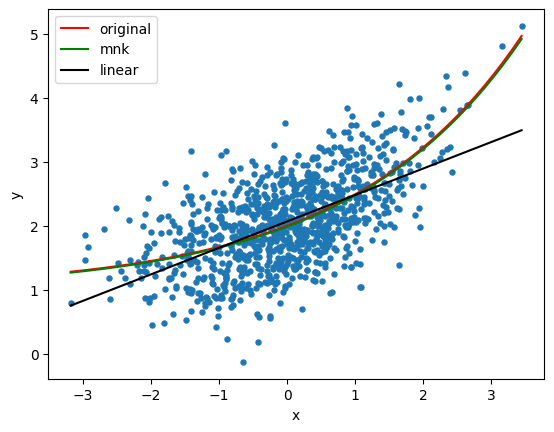

In [87]:
domain = np.linspace(x.min(), x.max())

plt.scatter(x, y, s=13)
plt.plot(domain, f(domain), label="original", color="red")
plt.plot(domain, f(domain, a=res.x[0], b=res.x[1]), label="mnk", color="green")
plt.plot(domain, alpha + beta*domain, label="linear", color="black")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Вычислим невязки моделей

In [88]:
def Q(y, y_pred):
    return np.sum((y - y_pred)**2)

In [89]:
Q_orig = Q(y, f(x))
Q_lin = Q(y, y_lin)
Q_mnk = Q(y, f(x, a=res.x[0], b=res.x[1]))

In [90]:
Q_orig

298.8797739734134

In [91]:
Q_lin

318.0460699522463

In [92]:
Q_mnk

298.58798781303886